
<h1 align="center"><font size="5">Classification with Python</font></h1>


### About dataset
This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant             

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

### Load Data From CSV File


In [3]:
df = pd.read_csv('E://DATA/BankLoan/Bloan.csv')
df.info

<bound method DataFrame.info of      Unnamed: 0  index  Unnamed: 0.1  Unnamed: 0.1.1 loan_status  Principal  \
0             0      0             0               0     PAIDOFF       1000   
1             1      1             2               2     PAIDOFF       1000   
2             2      2             3               3     PAIDOFF       1000   
3             3      3             4               4     PAIDOFF       1000   
4             4      4             6               6     PAIDOFF       1000   
..          ...    ...           ...             ...         ...        ...   
395         395     49           348             348  COLLECTION       1000   
396         396     50           349             349  COLLECTION        800   
397         397     51           369             369  COLLECTION       1000   
398         398     52           370             370  COLLECTION        800   
399         399     53           396             396  COLLECTION       1000   

     terms effectiv

In [13]:
df.head(10)

,index,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


### Feature Selection


In [5]:
x = pd.read_csv('E://DATA/BankLoan/Bloan_Feature.csv')
x[0:5]

,Unnamed: 0,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0,1000,30,45,0,0,0,1,0
1,1,1000,30,33,1,0,1,0,0
2,2,1000,15,27,0,0,0,0,1
3,3,1000,30,28,1,1,0,0,1
4,4,1000,30,29,0,1,0,0,1


Our lables

In [7]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
y = df['loan_status']
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Normalize Data


In [28]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.50130175,  0.92089421,  2.31334964, -0.43236977, -1.21838912,
        -0.38655567,  1.15133896, -0.86855395],
       [ 0.50130175,  0.92089421,  0.32194392,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175, -0.9332552 , -0.67375893, -0.43236977, -1.21838912,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.50780846,  2.31283513,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.34185798, -0.43236977,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896]])

In [29]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn import metrics

# Classification


following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression


# K Nearest Neighbor(KNN)


In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size= 0.25, random_state = 42)
print('x_train:',x_train1.shape ,'x_test:',x_test1.shape )

x_train: (300, 8) x_test: (100, 8)


Best accuracy = 0.7568100163309743 in k =  7


Text(0, 0.5, 'Accuracy')

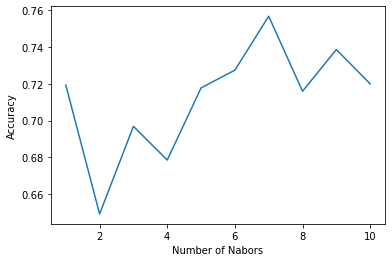

In [39]:
k_list = range(1,11)
F1_list = []
for i in k_list:
    KNN_model = KNN(n_neighbors = i).fit(x_train1, y_train1)
    y_hat1 = KNN_model.predict(x_test1)
    jaccard_score(y_test1, y_hat1) 
    F1 = f1_score(y_test1, y_hat1, average='weighted')
    F1_list.append(F1) 
print('Best accuracy =' , max(F1_list) ,'in k = ', F1_list.index(max(F1_list))+1)

plt.plot(k_list, F1_list)
plt.xlabel('Number of Nabors')
plt.ylabel('Accuracy')

In [41]:
KNN_model = KNN(n_neighbors = 7).fit(x_train1, y_train1)
y_hat1 = KNN_model.predict(x_test1)
print('jaccard_score :', jaccard_score(y_test1, y_hat1),'  ''f1_score:', f1_score(y_test1, y_hat1, average='weighted'))

jaccard_score : 0.776595744680851   f1_score: 0.7568100163309743


# Decision Tree


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size= 0.2, random_state = 42)
DTree_model = DecisionTreeClassifier(criterion='entropy', max_depth=6).fit(x_train2, y_train2)
y_hat2 = DTree_model.predict(x_test2)
print('x_train:',x_train1.shape ,'x_test:',x_test1.shape )

x_train: (300, 8) x_test: (100, 8)


              precision    recall  f1-score   support

           0       0.36      0.26      0.30        19
           1       0.79      0.85      0.82        61

    accuracy                           0.71        80
   macro avg       0.57      0.56      0.56        80
weighted avg       0.69      0.71      0.70        80

Confusion matrix, without normalization
[[52  9]
 [14  5]]


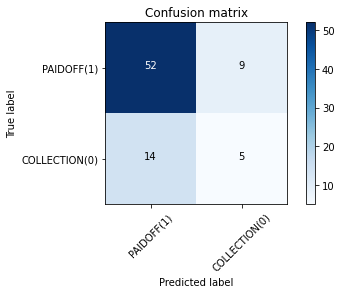

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_test2, y_hat2, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test2, y_hat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(0)'],normalize= False,  title='Confusion matrix') 

In [46]:
print('jaccard_score :', jaccard_score(y_test2, y_hat2),'  ''f1_score:', f1_score(y_test2, y_hat2, average='weighted'))

jaccard_score : 0.6933333333333334   f1_score: 0.6963791457885946


# Support Vector Machine


In [47]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import itertools
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size= 0.2, random_state = 42)
SVM_model = svm.SVC(kernel='rbf').fit(x_train3, y_train3)
y_hat3 = SVM_model.predict(x_test3)

              precision    recall  f1-score   support

           0       0.40      0.21      0.28        19
           1       0.79      0.90      0.84        61

    accuracy                           0.74        80
   macro avg       0.59      0.56      0.56        80
weighted avg       0.69      0.74      0.71        80

Confusion matrix, without normalization
[[55  6]
 [15  4]]


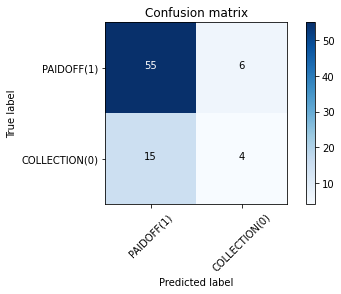

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_test3, y_hat3, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test3, y_hat3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(0)'],normalize= False,  title='Confusion matrix')  

In [49]:
print('jaccard_score :', jaccard_score(y_test3, y_hat3),'  ''f1_score:', f1_score(y_test3, y_hat3, average='weighted'))

jaccard_score : 0.7236842105263158   f1_score: 0.7057844169518295


# Logistic Regression


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size= 0.2, random_state = 42)

In [57]:
LR_model = LogisticRegression(C= 0.01, solver='liblinear').fit(x_train4, y_train4)
y_hat4 = LR_model.predict(x_test4)
y_hatP = LR_model.predict_proba(x_test4)

              precision    recall  f1-score   support

           0       0.45      0.26      0.33        19
           1       0.80      0.90      0.85        61

    accuracy                           0.75        80
   macro avg       0.63      0.58      0.59        80
weighted avg       0.72      0.75      0.72        80

Confusion matrix, without normalization
[[55  6]
 [14  5]]


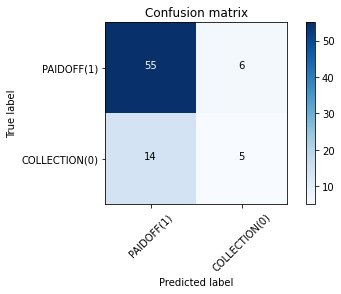

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_test4, y_hat4, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test4, y_hat4))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(0)'], normalize= False,  title='Confusion matrix')  

In [59]:
print('jaccard_score :', jaccard_score(y_test1, y_hat1),'  ''f1_score:', f1_score(y_test1, y_hat1, average='weighted'),'  ','log_loss:' ,log_loss(y_test4, y_hatP))

jaccard_score : 0.776595744680851   f1_score: 0.7568100163309743    log_loss: 0.5596907060028553


# Model Evaluation using Test set


# Report :




| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| __KNN__                | 0.77       | 0.756        | NA      |
| Decision Tree      | 0.693       | 0.696        | NA      |
| SVM                | 0.72       | 0.70        | NA      |
| __LogisticRegression__ | 0.776       | 0.756        | 0.559|